# Get Unit 4 data in as 'data'

In [59]:
ls

customer_churn.csv                statewithgift.csv
googleplaystore.csv               strokes_data.csv
googleplaystore_user_reviews.csv  unit4.csv
lesson_4.05_data.csv


In [60]:
churn=pd.read_csv('customer_churn.csv')

In [61]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<AxesSubplot:>

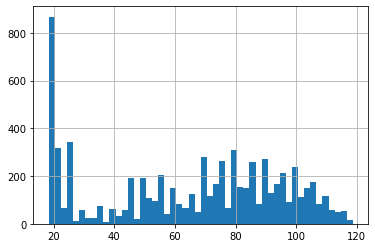

In [85]:
churn['MonthlyCharges'].hist(bins=50)

In [86]:
churn['MonthlyCharges'].value_counts()

20.05     61
19.85     45
19.95     44
19.90     44
20.00     43
          ..
23.65      1
114.70     1
43.65      1
87.80      1
78.70      1
Name: MonthlyCharges, Length: 1585, dtype: int64

In [63]:
from sklearn.preprocessing import Normalizer

In [74]:
churn_n=churn[['tenure','MonthlyCharges']]

In [75]:
churn_n

,tenure,MonthlyCharges
0,1,29.85
1,34,56.95
2,2,53.85
3,45,42.30
4,2,70.70
...,...,...
7038,24,84.80
7039,72,103.20
7040,11,29.60
7041,4,74.40


In [76]:
new_tenure=Normalizer().fit(churn_n)

In [79]:
scaled=pd.DataFrame(new_tenure.transform(churn_n), columns=['tenure','MonthlyCharges'])

<AxesSubplot:>

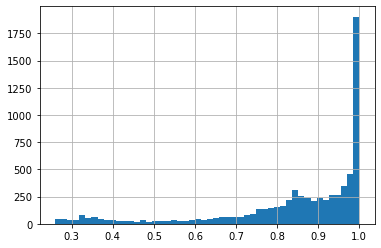

In [87]:
scaled['MonthlyCharges'].hist(bins=50)

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import datetime as dt

In [2]:
cd ..

/Users/siandavies/Documents/GitHub/BCNDATA2022/ClassMaterials/Week4


In [3]:
cd CaseStudies/other_data/

/Users/siandavies/Documents/GitHub/BCNDATA2022/ClassMaterials/Week4/CaseStudies/other_data


In [4]:
ls

customer_churn.csv                statewithgift.csv
googleplaystore.csv               strokes_data.csv
googleplaystore_user_reviews.csv  unit4.csv
lesson_4.05_data.csv


In [7]:
data=pd.read_csv('unit4.csv')

In [8]:
data.columns

Index(['STATE', 'PVASTATE', 'DOB', 'MDMAUD', 'RECP3', 'GENDER', 'DOMAIN',
       'INCOME', 'HOMEOWNR', 'HV1', 'HV2', 'HV3', 'HV4', 'IC1', 'IC2', 'IC3',
       'IC4', 'IC5', 'VETERANS', 'NUMPROM', 'CARDPROM', 'CARDPM12', 'NUMPRM12',
       'MAXADATE', 'RFA_2', 'NGIFTALL', 'TIMELAG', 'AVGGIFT'],
      dtype='object')

In [ ]:
data.info()

## split the data into numericals and categoricals for EDA 

In [9]:
d_num=data.select_dtypes(np.number)
d_cat=data.select_dtypes(object)

### data quality check 

In [ ]:
data.info()

In [ ]:
# count duplicates 
data.duplicated().sum()

In [ ]:
# see duplicates 
data[data.duplicated(keep=False)]

In [10]:
# drop duplicate row 
data=data.drop_duplicates()

In [ ]:
# drop nulls and any obvious columns to drop ? 

### after removing rows - reset index 

In [11]:
data.reset_index(drop=True,inplace=True)

### see all columns, EDA on numericals and categoricals 

In [12]:
pd.set_option('display.max_columns',None)

In [13]:
data.head()

,STATE,PVASTATE,DOB,MDMAUD,RECP3,GENDER,DOMAIN,INCOME,HOMEOWNR,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,VETERANS,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,RFA_2,NGIFTALL,TIMELAG,AVGGIFT
0,IL,,3712,XXXX,,F,T2,NaN,,479,635,3,2,307,318,349,378,12883,,74,27,6,14,9702,L4E,31,4.0,7.741935
1,CA,,5202,XXXX,,M,S1,6.0,H,5468,5218,12,10,1088,1096,1026,1037,36175,,32,12,6,13,9702,L2G,3,18.0,15.666667
2,NC,,0,XXXX,,M,R2,3.0,U,497,546,2,1,251,292,292,340,11576,,63,26,6,14,9702,L4E,27,12.0,7.481481
3,CA,,2801,XXXX,,F,R2,1.0,U,1000,1263,2,1,386,388,396,423,15130,,66,27,6,14,9702,L4E,16,9.0,6.812500
4,FL,,2001,XXXX,X,F,S2,3.0,H,576,594,4,3,240,250,293,321,9836,,113,43,10,25,9702,L2F,37,14.0,6.864865


In [41]:
d_num=data.select_dtypes(np.number)
d_cat=data.select_dtypes(object)

# Numeric columns handling 

In [ ]:
d_num.info()

## create a nulls df which summarises % of nulls per column 

In [34]:
nulls=pd.DataFrame(d_num.isna().sum()/len(d_num)) # work on the numericals first 
# eg 3 rows nulls / 4 rows data 

In [35]:
nulls.reset_index(inplace=True)

In [36]:
nulls.columns=['column_name','percentage_nulls']
nulls.sort_values(by='percentage_nulls',ascending=False)
# this is your data quality snapshot 

,column_name,percentage_nulls
1,INCOME,0.222838
17,TIMELAG,0.106572
0,DOB,0.000000
10,IC5,0.000000
16,NGIFTALL,0.000000
15,MAXADATE,0.000000
14,NUMPRM12,0.000000
13,CARDPM12,0.000000
12,CARDPROM,0.000000
11,NUMPROM,0.000000


## fill in nulls 
- with a fixed value 
- with interpolation 

In [ ]:
d_num.describe()

In [ ]:
d_num['INCOME'].unique()

In [ ]:
d_num['INCOME'].value_counts()

In [ ]:
d_num['INCOME'].median()

In [ ]:
d_num['INCOME'].mean()

In [ ]:
d_num['INCOME'].hist()

In [ ]:
d_num.head(10)

In [ ]:
zeros_d=d_num['INCOME'].fillna(0)

In [ ]:
zeros_d.head(10)

In [ ]:
zeros_d.hist()

### after picking your method - apply to your dataframe 

In [19]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
d_num['INCOME']=d_num['INCOME'].fillna(0)

In [ ]:
d_num['TIMELAG'].hist()

In [ ]:
d_num['TIMELAG'].unique()

In [ ]:
d_num.describe()

In [ ]:
d_num['TIMELAG'].describe()

In [ ]:
timelag=d_num['TIMELAG']

In [ ]:
timelag=timelag[timelag<60]

In [ ]:
timelag.hist(bins=5)

In [ ]:
d_num.columns

In [ ]:
sns.scatterplot(data=d_num, x="TIMELAG", y="AVGGIFT");

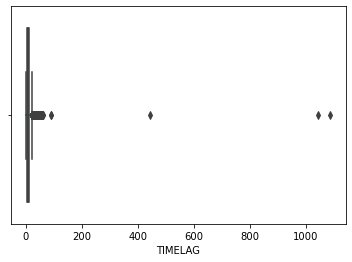

In [37]:
sns.boxplot(d_num['TIMELAG']);

In [ ]:
# removing outliers then scatter plot again 
- IQR 
-upper_limit 
- exclude anything over upper limit 
OR FILTER BY A FIXED LIMIT 

In [27]:
d_num

,DOB,INCOME,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,NGIFTALL,TIMELAG,AVGGIFT
0,3712,0.0,479,635,3,2,307,318,349,378,12883,74,27,6,14,9702,31,4.0,7.741935
1,5202,6.0,5468,5218,12,10,1088,1096,1026,1037,36175,32,12,6,13,9702,3,18.0,15.666667
2,0,3.0,497,546,2,1,251,292,292,340,11576,63,26,6,14,9702,27,12.0,7.481481
3,2801,1.0,1000,1263,2,1,386,388,396,423,15130,66,27,6,14,9702,16,9.0,6.812500
4,2001,3.0,576,594,4,3,240,250,293,321,9836,113,43,10,25,9702,37,14.0,6.864865
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90563,4803,6.0,733,875,4,3,285,288,333,334,11390,59,23,5,12,9702,24,3.0,3.375000
90564,0,0.0,988,1025,6,6,433,481,499,535,18807,14,6,5,12,9702,1,NaN,25.000000
90565,5001,7.0,1679,1723,3,3,806,836,802,849,26538,10,4,3,8,9702,1,NaN,20.000000
90566,3801,0.0,376,377,4,3,263,264,319,345,12178,33,14,7,17,9702,7,3.0,8.285714


In [42]:
d_num['TIMELAG']=d_num['TIMELAG'].fillna(0)

In [44]:
iqr= np.percentile(d_num['TIMELAG'],75) - np.percentile(d_num['TIMELAG'],25)
upper=np.percentile(d_num['TIMELAG'],75) + iqr 
new_data=data[data['TIMELAG']<upper]

In [46]:
new_data.shape # extreme 

(74023, 28)

<AxesSubplot:>

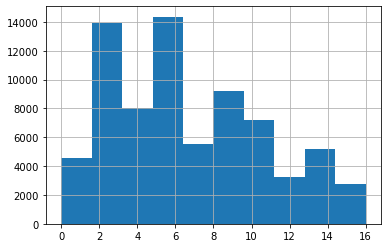

In [45]:
new_data['TIMELAG'].hist()

In [47]:
# pd.cut or pd.qcut 
# OR create function to bucket values 
def timelag_group(x):
    if x == 0:
        return 'unknown'
    elif x < 4:
        return 'less than 4 months'
    elif x < 8: 
        return '4-7 months'
    elif x <= 12:
        return 'up to 1 year'
    elif x  <= 24:
        return 'up to 2 years'
    else:
        return 'long lapse'

In [50]:
d_num['TIMEGROUP']=list(map(timelag_group,d_num['TIMELAG']))

In [51]:
d_num

,DOB,INCOME,HV1,HV2,HV3,HV4,IC1,IC2,IC3,IC4,IC5,NUMPROM,CARDPROM,CARDPM12,NUMPRM12,MAXADATE,NGIFTALL,TIMELAG,AVGGIFT,TIMEGROUP
0,3712,NaN,479,635,3,2,307,318,349,378,12883,74,27,6,14,9702,31,4.0,7.741935,4-7 months
1,5202,6.0,5468,5218,12,10,1088,1096,1026,1037,36175,32,12,6,13,9702,3,18.0,15.666667,up to 2 years
2,0,3.0,497,546,2,1,251,292,292,340,11576,63,26,6,14,9702,27,12.0,7.481481,up to 1 year
3,2801,1.0,1000,1263,2,1,386,388,396,423,15130,66,27,6,14,9702,16,9.0,6.812500,up to 1 year
4,2001,3.0,576,594,4,3,240,250,293,321,9836,113,43,10,25,9702,37,14.0,6.864865,up to 2 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90563,4803,6.0,733,875,4,3,285,288,333,334,11390,59,23,5,12,9702,24,3.0,3.375000,less than 4 months
90564,0,NaN,988,1025,6,6,433,481,499,535,18807,14,6,5,12,9702,1,0.0,25.000000,unknown
90565,5001,7.0,1679,1723,3,3,806,836,802,849,26538,10,4,3,8,9702,1,0.0,20.000000,unknown
90566,3801,NaN,376,377,4,3,263,264,319,345,12178,33,14,7,17,9702,7,3.0,8.285714,less than 4 months


## correlation 

In [ ]:
- correlation matrix (with or without mask, consider colours )
- joint plot 
- pair plot 
- scatter plot 
- box plot 

<AxesSubplot:>

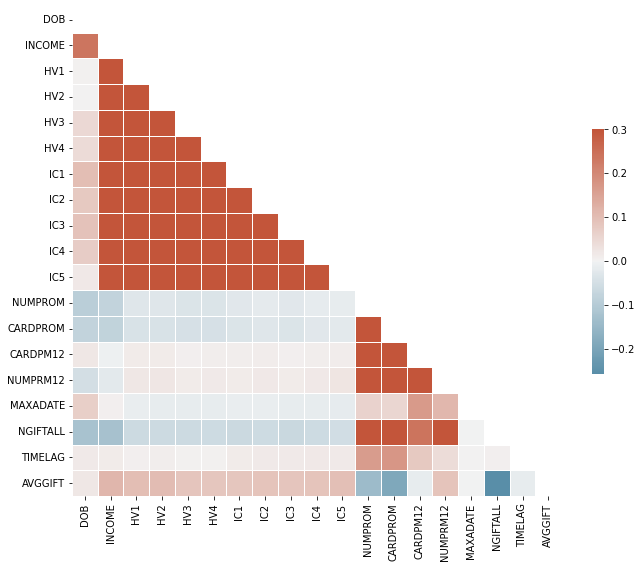

In [54]:
corr=d_num.corr(method='pearson')

mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

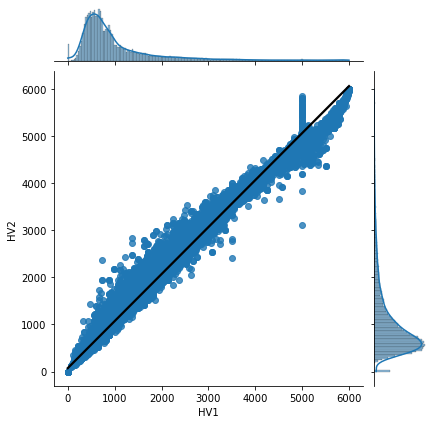

In [58]:
sns.jointplot(x="HV1", y="HV2", data=d_num, kind='reg',joint_kws={'line_kws':{'color':'black'}});

### VIF 

# Categorical columns 

In [ ]:
d_cat.columns

In [ ]:
d_cat.info()

### common things to check 
- blanks and nulls and any other weird values 
- relevance - from the cat to the target 
    - chi squared test 
- cardinality (how many diff values are in that column, are there some small ones which can be grouped)

In [ ]:
d_cat['MDMAUD'].unique()

In [ ]:
d_cat['MDMAUD'].value_counts()

In [ ]:
major=data[(data.MDMAUD != 'XXXX')] # looking at major donors only 

In [ ]:
major.describe()

In [ ]:
d_num['AVGGIFT'].mean()

In [ ]:
# conclusion - replace value MDMAUD with major_donor, not_major_donor
def grp_mdmaud(x): 
    if x == 'XXXX':
        return 'not_major_donor'
    else:
        return 'major_donor'
d_cat['MDMAUD']=list(map(grp_mdmaud,d_cat['MDMAUD']))

In [ ]:
grp_mdmaud('XXXX')

In [ ]:
d_cat['STATE'].value_counts()

how to establish relevance 
- box plot , cat plot with jitter , map (in tableau or in python eg folium )
- groupby state with mean, median,

In [ ]:
geo=data[['STATE','AVGGIFT']]

In [ ]:
geo.to_csv('statewithgift.csv')

In [ ]:
grouping=data.groupby("STATE").agg({"AVGGIFT": [np.mean, np.median, 'count']})

In [ ]:
grouping.columns=['mean','median','count']

In [ ]:
grouping.sort_values(by='mean', ascending=False)

In [ ]:
ax=sns.catplot(data=data,x='STATE',y='AVGGIFT').set(title='state by state v avg gift amount')
ax.fig.set_figwidth(20)

## chi squared test 

- looking for correlation between categories
- create a crosstab between the columns 
- run the test 
- evaluate the results 

In [ ]:
from scipy.stats import chi2_contingency
# just an example conceptually 

In [ ]:
d_cat.columns

In [ ]:
data_crosstab=pd.crosstab(d_cat['HOMEOWNR'], d_cat['RFA_2'], margins = False)

In [ ]:
data_crosstab

In [ ]:
chi2_contingency(data_crosstab, correction=False)

In [ ]:
#this returns 4 results in this order:
#(chi-square statistic,
# p value, 
# degrees of freedom, 
# expected frequencies matrix)